In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().any().value_counts()

False    9
dtype: int64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df_x = df.drop(columns='Outcome', axis=1)
df_y = df['Outcome']
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(df_x)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledX, df_y, test_size=0.47, random_state=47)

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

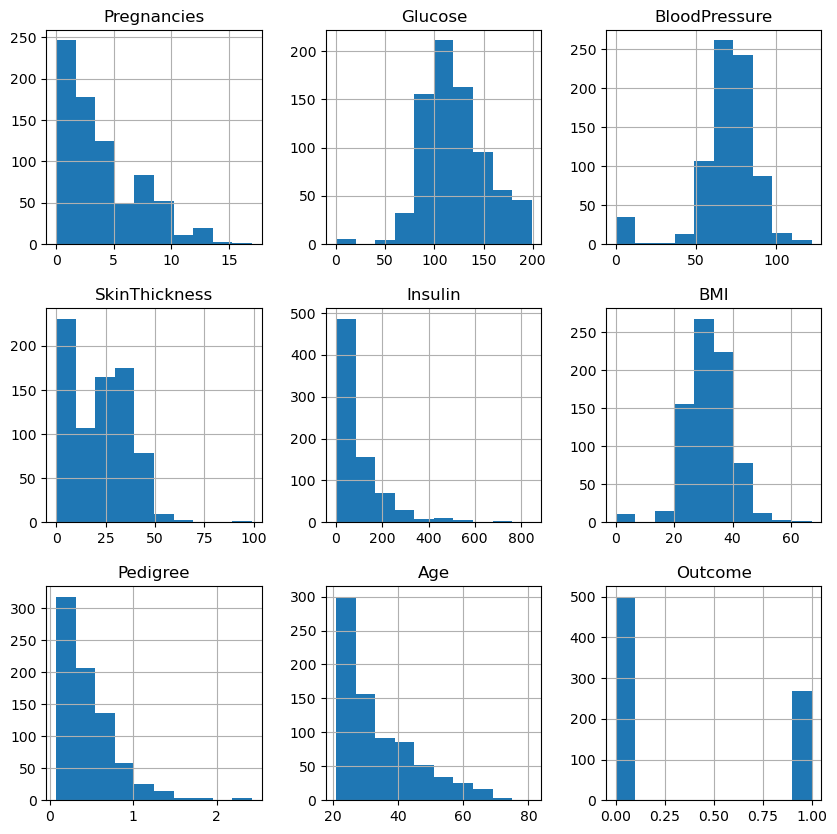

In [12]:
p = df.hist(figsize = (10,10))

In [13]:
# Confusion matrix
cs = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",cs)

Confusion matrix: 
 [[195  40]
 [ 72  54]]


In [14]:
# Accuracy score
ac = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ",ac)


Accuracy score:  0.6897506925207756


In [15]:
# Error rate (error_rate = 1- accuracy)
er = 1-ac
print("Error rate: ",er)

Error rate:  0.3102493074792244


In [16]:
# Precision
p = metrics.precision_score(y_test,y_pred)
print("Precision: ", p)

Precision:  0.574468085106383


In [17]:
# Recall
r = metrics.recall_score(y_test,y_pred)
print("Recall: ", r)

Recall:  0.42857142857142855


In [18]:
# Classification report
cr = metrics.classification_report(y_test,y_pred)
print("Classification report: \n\n", cr)

Classification report: 

               precision    recall  f1-score   support

           0       0.73      0.83      0.78       235
           1       0.57      0.43      0.49       126

    accuracy                           0.69       361
   macro avg       0.65      0.63      0.63       361
weighted avg       0.68      0.69      0.68       361

